In [1]:
%load_ext autoreload
%autoreload 2
import numpy as np
import pandas as pd
import seaborn as sns
import data_exploration as de
import data_cleanup as dc
import functions as fun
import Documentation as doc
import severity_score as ses
import scipy.stats as stats
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics.pairwise import euclidean_distances
from sklearn.cluster import AgglomerativeClustering

In [2]:
# These are all the datasets we used
gia_null_eto: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Etoposide_2018.csv')
gia_null_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_NULL_Nutlin_2018.csv')
gia_wt_nut: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Giacomelli_WT_Nutlin_2018.csv')
kot_hum: pd.DataFrame = pd.read_csv('../DMS_data/P53_HUMAN_Kotler_2018.csv')

aa = pd.read_csv('../DMS_data/aminoacids.csv')

In [3]:
gia_null_eto_norm : pd.DataFrame = dc.norm(gia_null_eto)
gia_null_nut_norm : pd.DataFrame = dc.norm(gia_null_nut)
gia_wt_nut_norm : pd.DataFrame = dc.norm(gia_wt_nut)
kot_hum_norm : pd.DataFrame = dc.norm(kot_hum)

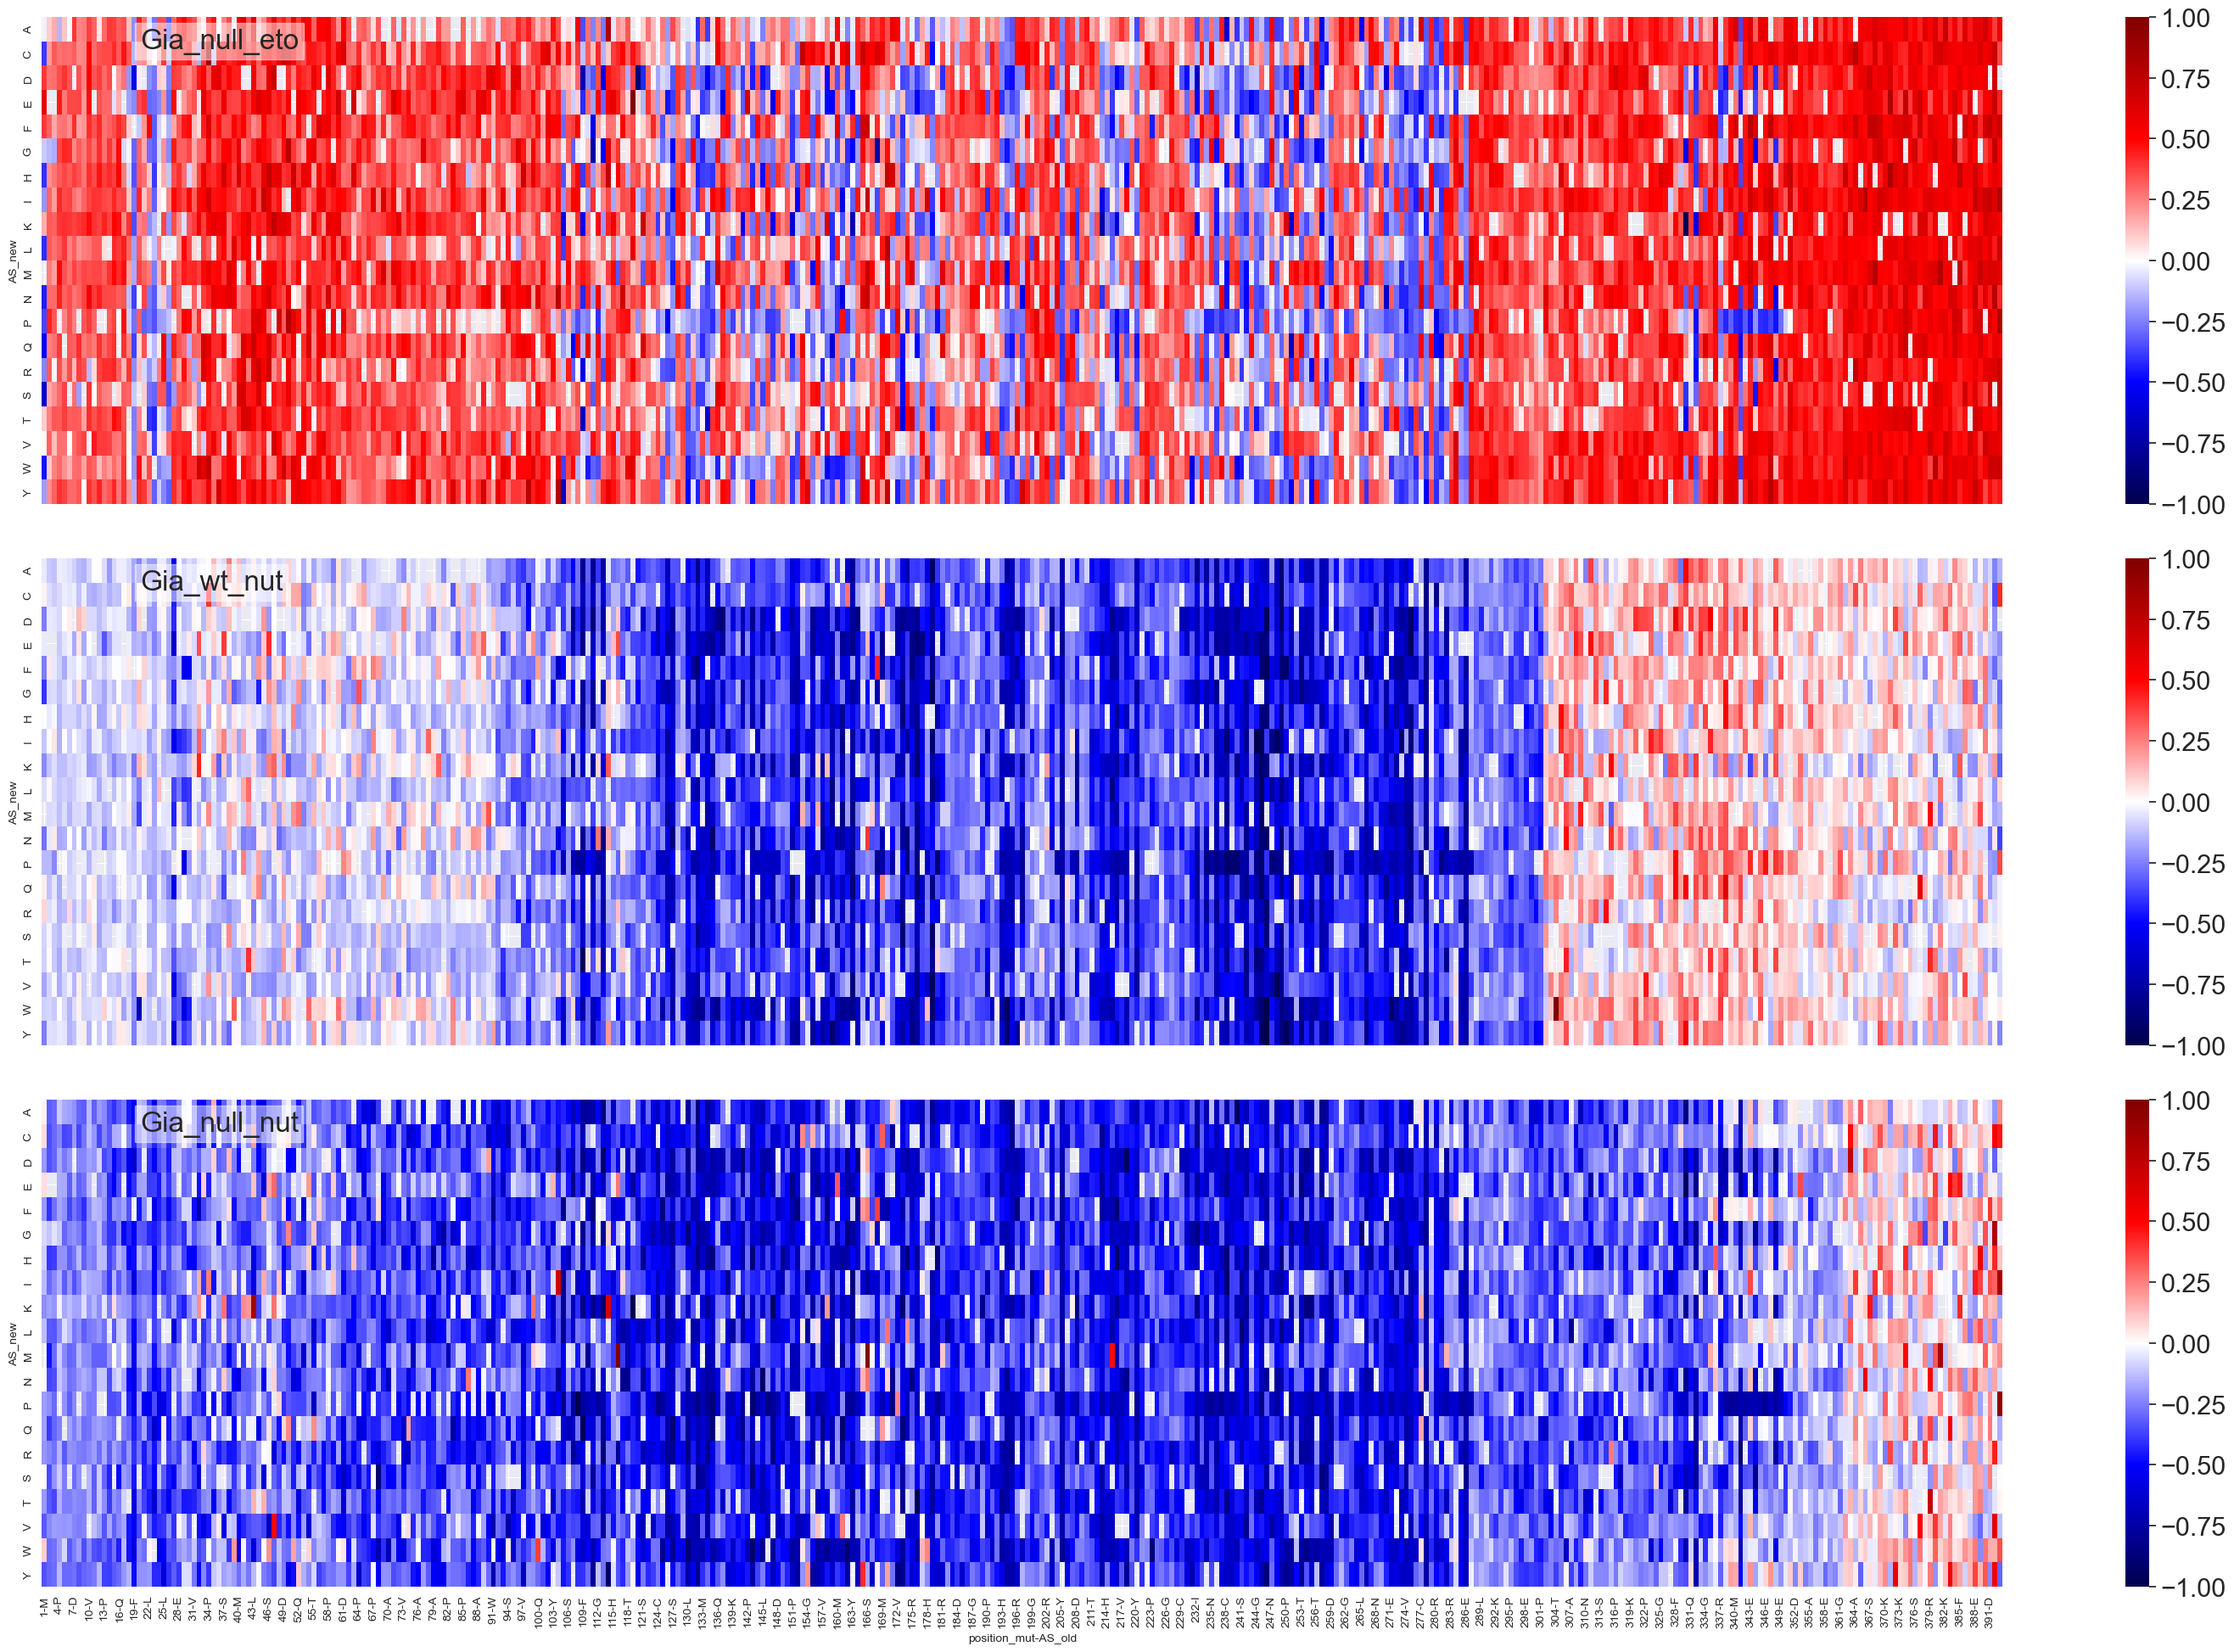

In [4]:
# Giacomelli Null Etoposide, Giacomelli Wildtype Nutlin, Giacomelli Null Nutlin
fun.mult_hmap(gia_null_eto_norm, gia_wt_nut_norm, gia_null_nut_norm)

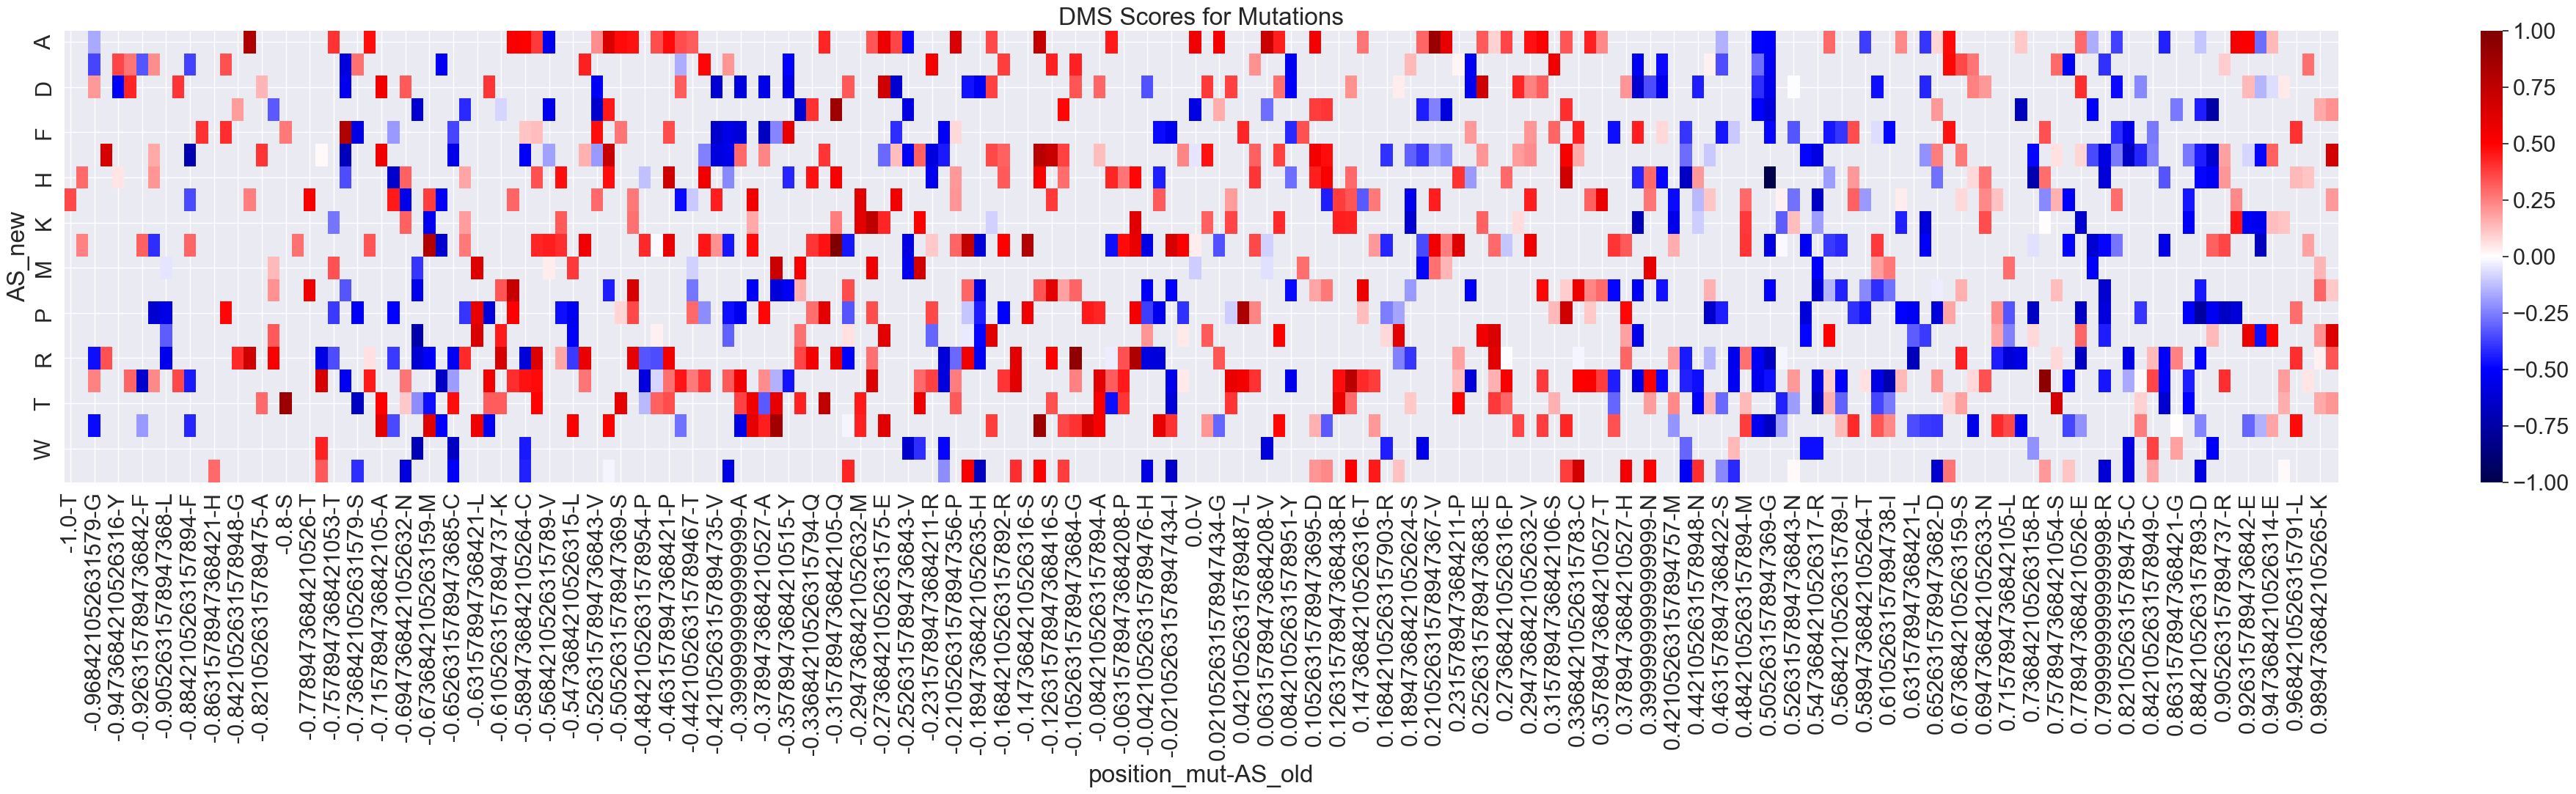

In [ ]:
# Kotler
fun.hmap(doc.kot_hum_auf_norm)

In [6]:
fun.calculate_average_dms_score_old(('GNE', doc.gia_null_eto_amp_norm), ('GNN', doc.gia_null_nut_amp_norm), ('GWN', doc.gia_wt_nut_amp_norm), ('KH', doc.kot_hum_amp_norm))

GNE       GNN       GWN        KH
AS_old                                        
A       0.297155 -0.341339 -0.132955  0.099555
C      -0.051440 -0.545096 -0.543561 -0.145375
D       0.294087 -0.293424 -0.160131  0.170728
E       0.304599 -0.295454 -0.177860  0.100811
F       0.053043 -0.445465 -0.215654 -0.250488
G       0.260013 -0.327492 -0.204543 -0.070218
H       0.224304 -0.311369 -0.315392 -0.063656
I      -0.067487 -0.558694 -0.405441 -0.146787
K       0.353891 -0.226912 -0.066513  0.089816
L       0.208043 -0.357187 -0.167821  0.039052
M       0.197418 -0.334375 -0.263420  0.130724
N       0.274435 -0.356652 -0.243670  0.153519
P       0.295862 -0.330032 -0.174216  0.163799
Q       0.365760 -0.274762 -0.130904  0.360414
R       0.166862 -0.374469 -0.253766 -0.117733
S       0.307954 -0.282235 -0.175382  0.164273
T       0.247172 -0.362978 -0.212313  0.231769
V       0.047415 -0.492980 -0.425382 -0.103461
W       0.125329 -0.453758 -0.189563  0.399937
Y      -0.058534 -0.572673 -0.491159 -0.358660

In [7]:
fun.calculate_average_dms_score_new(('GNE', doc.gia_null_eto_amp_norm), ('GNN', doc.gia_null_nut_amp_norm), ('GWN', doc.gia_wt_nut_amp_norm), ('KH', doc.kot_hum_amp_norm))

GNE       GNN       GWN        KH
AS_new                                        
A       0.230294 -0.366054 -0.215091  0.263278
C       0.306080 -0.298968 -0.162306  0.001974
D       0.177935 -0.380285 -0.229204 -0.050507
E       0.189927 -0.351673 -0.234932 -0.168010
F       0.265481 -0.330305 -0.208782 -0.066033
G       0.188055 -0.378543 -0.229989 -0.028291
H       0.237960 -0.358202 -0.210794  0.053206
I       0.284615 -0.312255 -0.214637  0.094158
K       0.212806 -0.339281 -0.220014  0.043194
L       0.238353 -0.358262 -0.226845  0.102409
M       0.299051 -0.286251 -0.177107  0.132921
N       0.251537 -0.331806 -0.213871 -0.058348
P       0.096191 -0.449589 -0.275914 -0.143151
Q       0.233595 -0.355782 -0.207876  0.092539
R       0.190213 -0.393423 -0.239513 -0.022793
S       0.224142 -0.375933 -0.218467  0.076901
T       0.239220 -0.353747 -0.213083  0.128089
V       0.284880 -0.325358 -0.199549  0.106847
W       0.210919 -0.344523 -0.225647 -0.335867
Y       0.265938 -0.311888 -0.219662 -0.015396

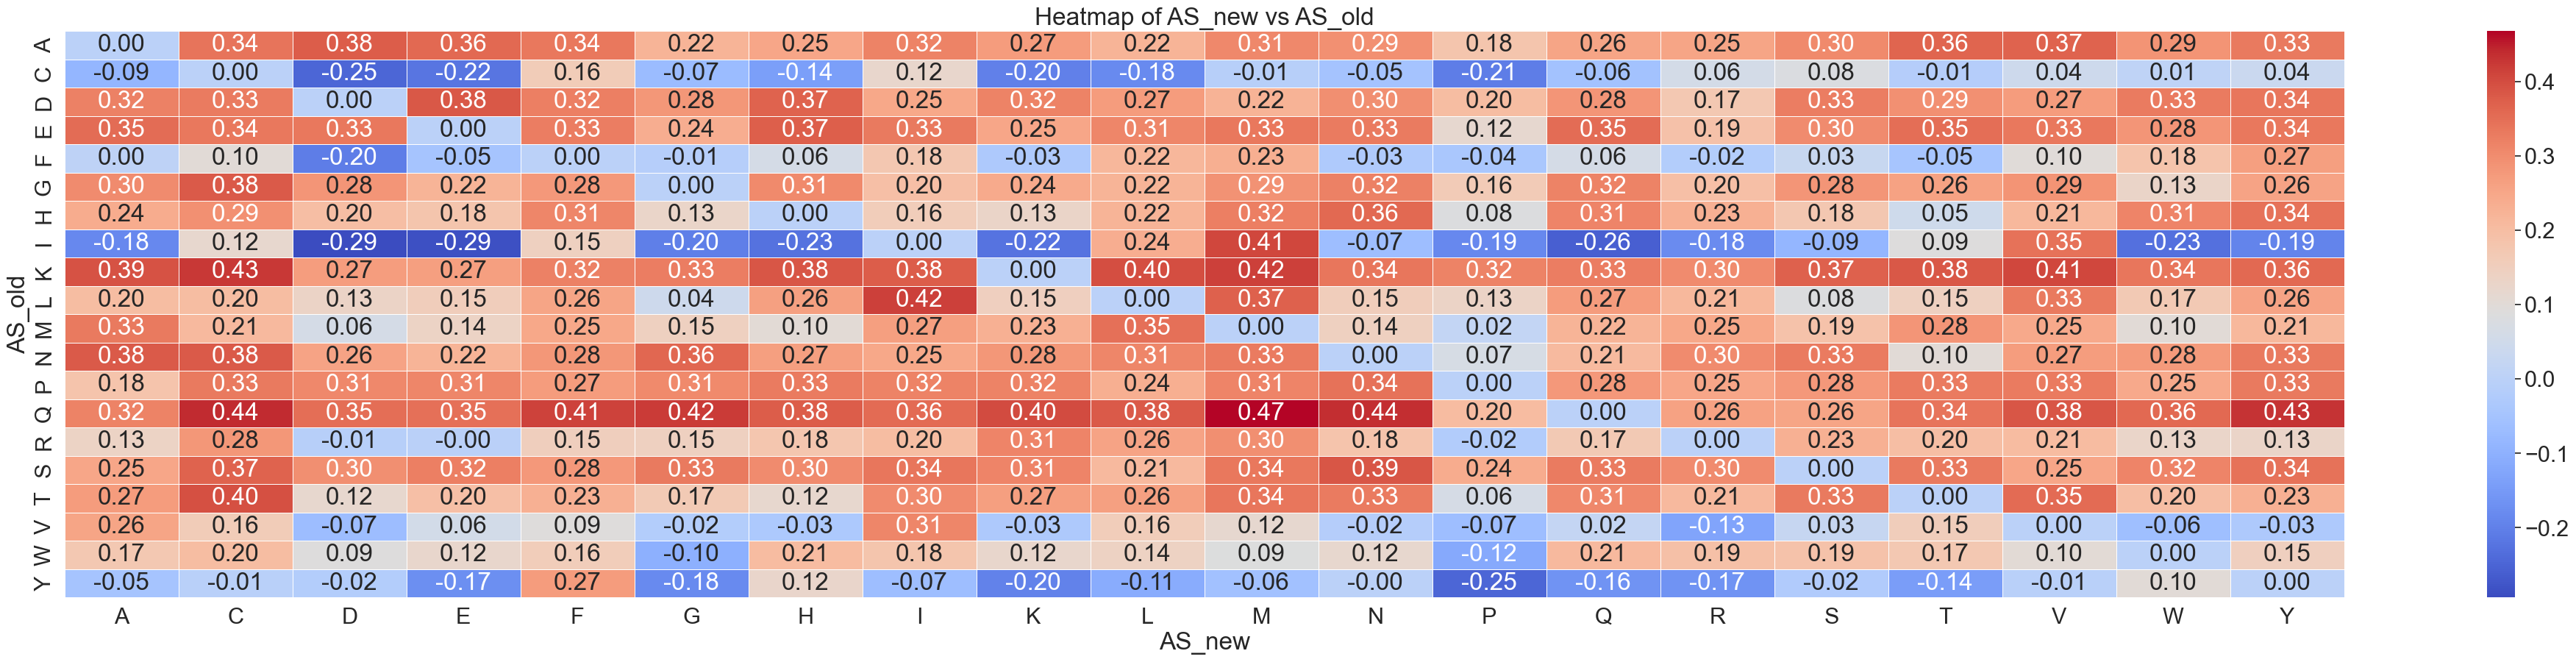

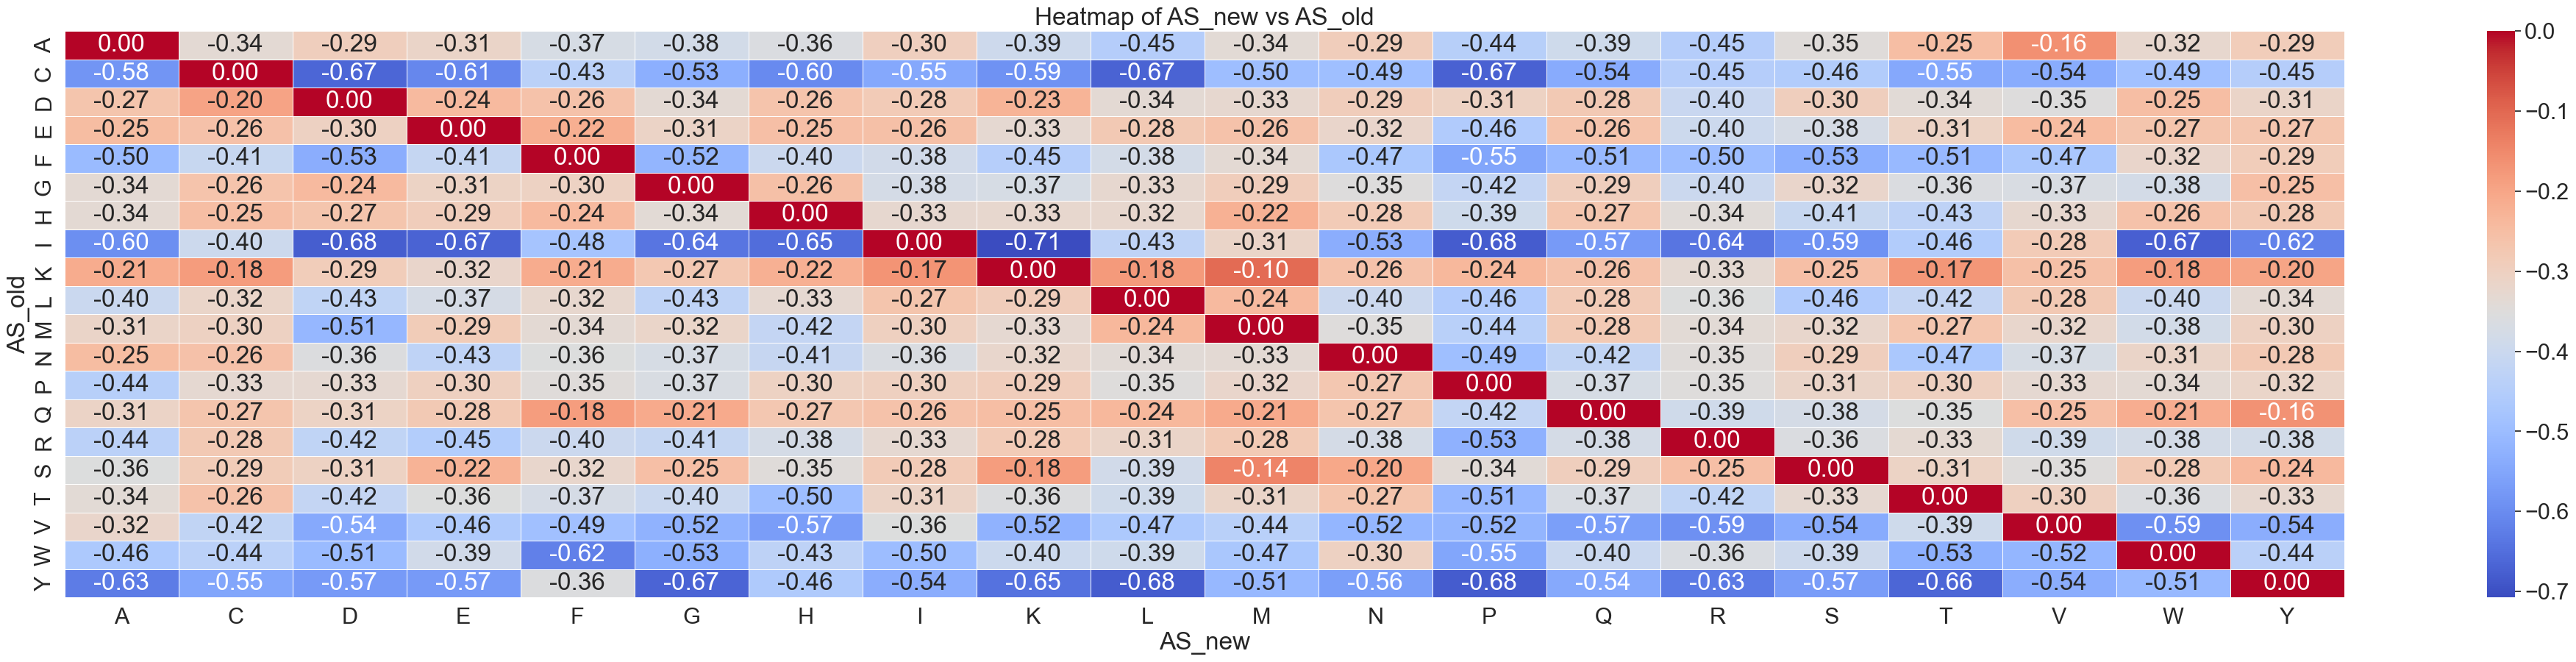

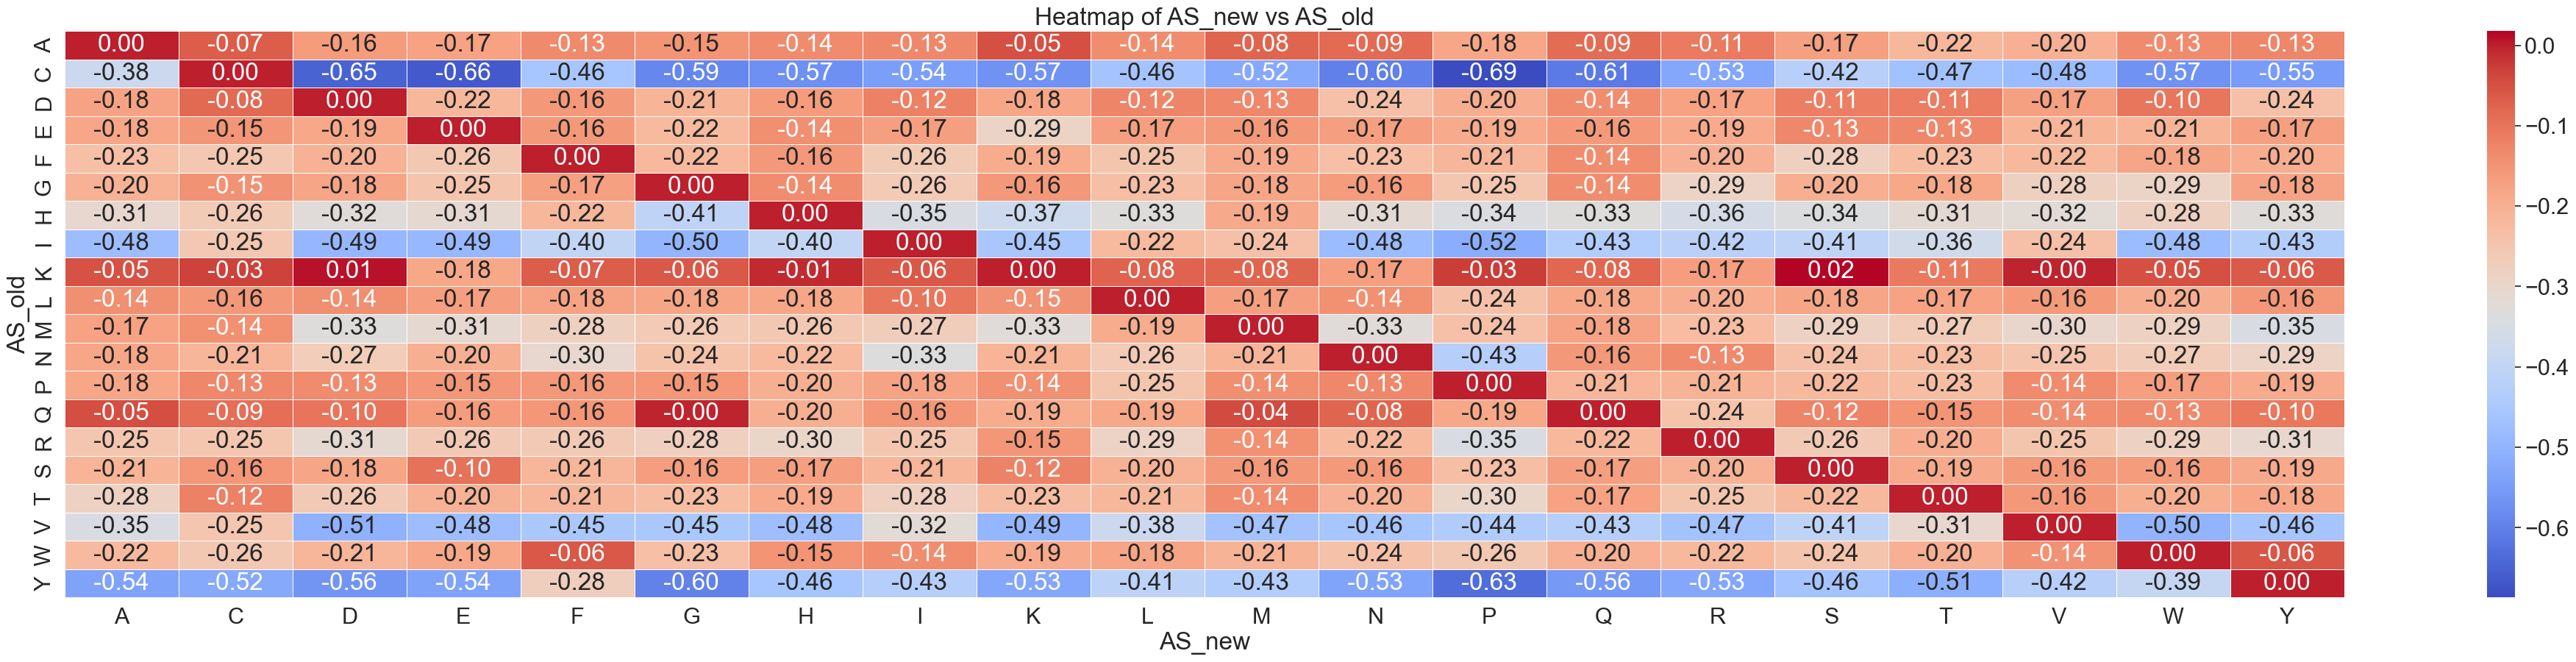

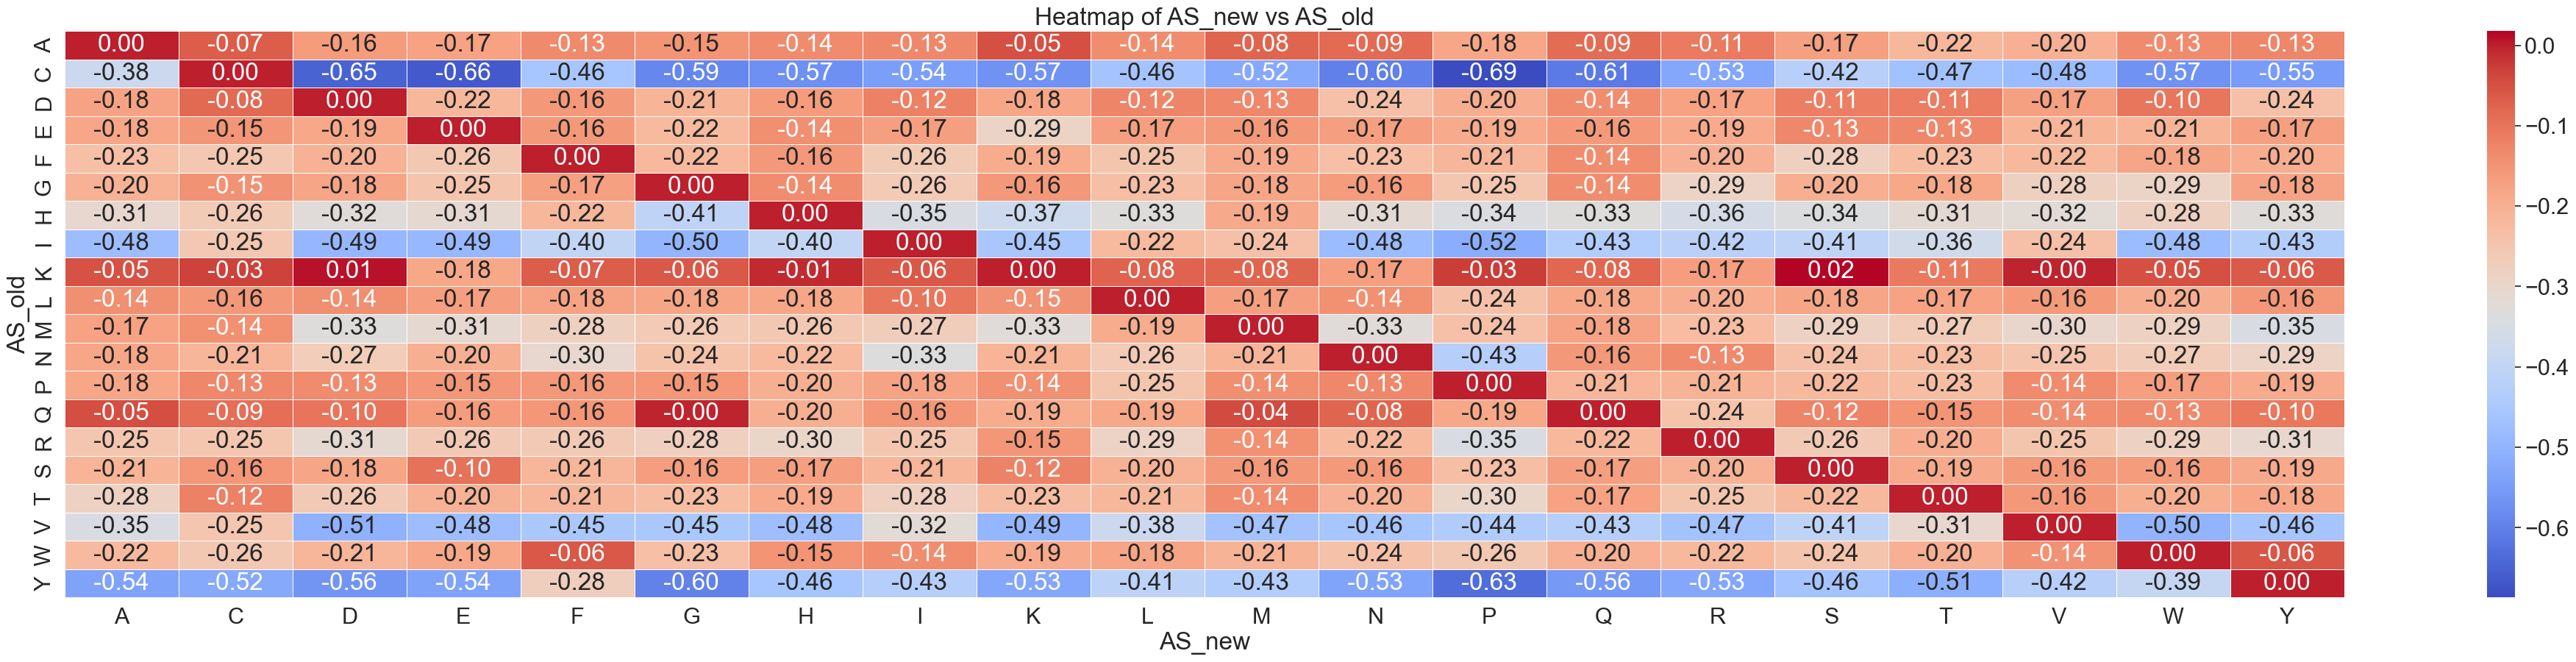

In [8]:
fun.hmap_mean_variance(doc.mean_substitutionsGNE)
fun.hmap_mean_variance(doc.mean_substitutionsGNN)
fun.hmap_mean_variance(doc.mean_substitutionsGWN)
fun.hmap_mean_variance(doc.mean_substitutionsKH)

In [9]:
# These heatmaps show different trends:
# What we need to consider is that the Kotler dataset only covers a range of amino acids. From postion 102 to 292.                                      While the "Giacomelli Wildtype Nutlin" and "Giacomelli Null Nutlin" datasets exhibit some similarities in terms of trends and values, the same cannot be said when comparing them to the "Giacomelli Null Etoposide" dataset. This disparity is likely due to the use of different p53 activating agents, namely nutlin-3 and etoposide. One notable observation across all datasets is that amino acids in the range of approximately 100-300 generally display a negative effect caused by mutations. This could indicate a specific region that is evolutionary conserved and perfected. Additionally, the Kotler dataset exhibits a scarcity of values, which should be taken into consideration for future work.
# In addition to visually comparing the datasets, I wanted to investigate whether the datasets share positions in the amino acid sequence where the sum of all DMS scores is the lowest. This would indicate that these specific locations are particularly conserved.

In [10]:
# The 5 lowest values in the "Giacomelli null etoposide" dataset
doc.GNELV

Sum
position_mut AS_old          
280          R      -6.190289
281          D      -6.189019
278          P      -5.751278
205          Y      -5.682232
275          C      -5.511703

In [11]:
# The 5 highest values in the "Giacomelli null etoposide" dataset
doc.GNEHV

Sum
position_mut AS_old           
392          S       11.438619
388          E       11.416638
393          D       11.382284
391          D       11.195635
374          G       11.153968

In [13]:
# The positions (-> most affected by mutation) are the following throughout each Dataset:
doc.lowest_vals.head(20)

Name of the Dataset  Location of lowest DMS_score sum        Sum   
0  Giacomelli Null Etoposide                               280  -6.190289  \
1     Giacomelli NULL Nutlin                               205 -13.762829   
2       Giacomelli WT Nutlin                               245 -15.419176   
3                     Kotler                               245  -6.568038   

  Original AA  
0           R  
1           Y  
2           G  
3           G

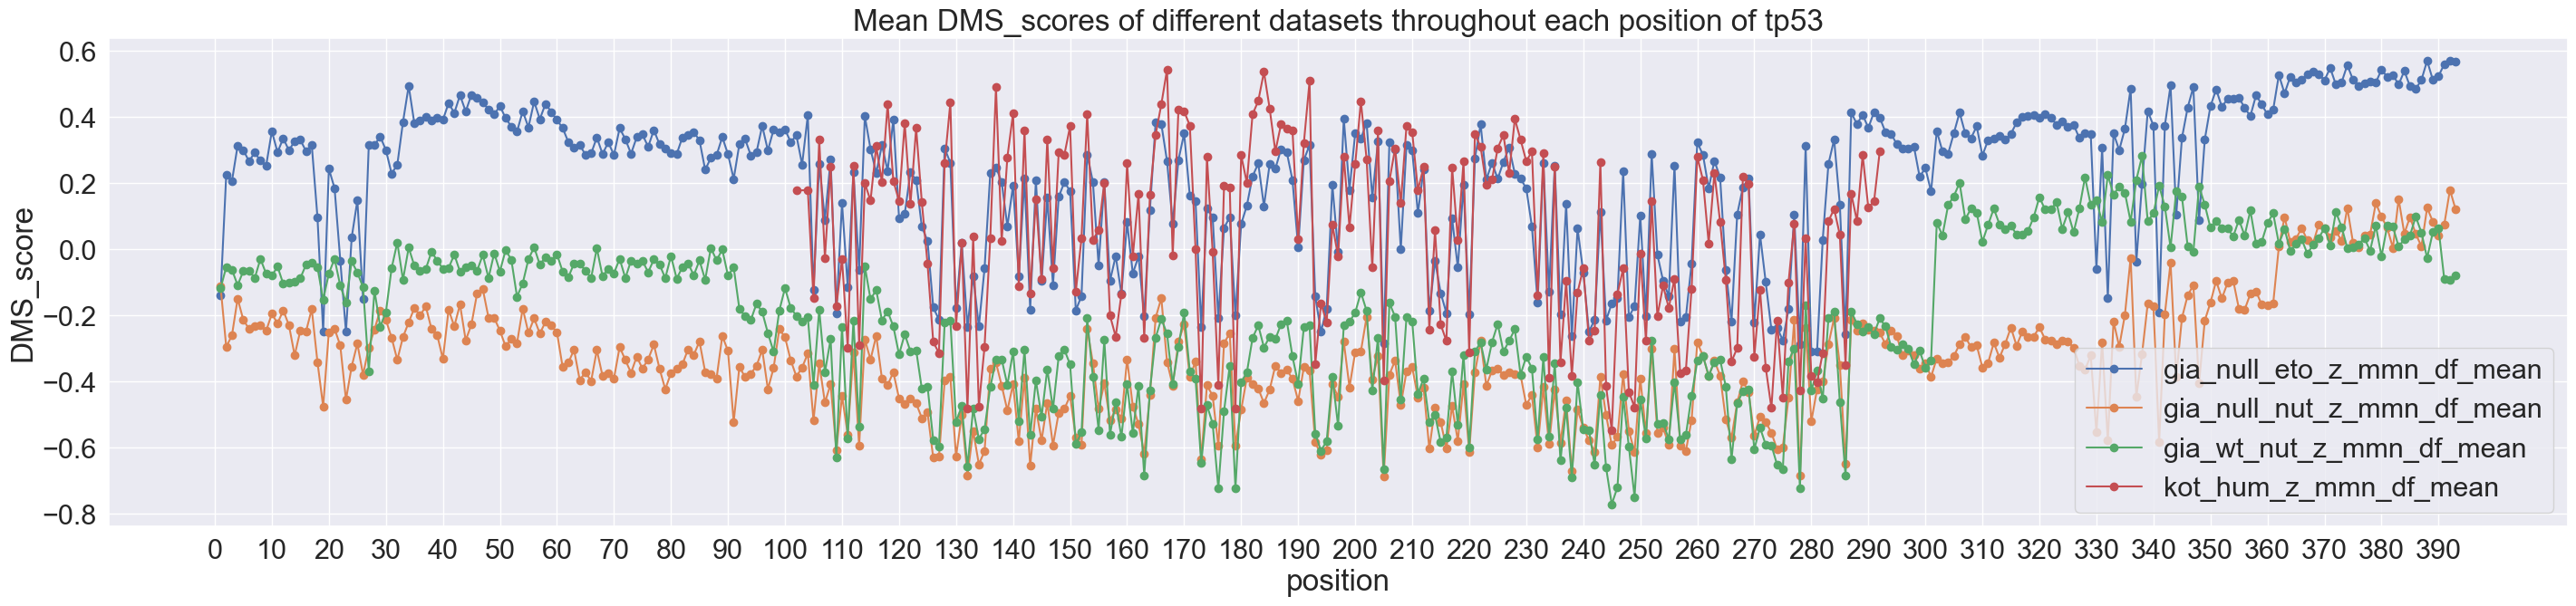

In [14]:
doc.liniengraph(dataframes=[doc.gia_null_eto_z_mmn_df_mean, doc.gia_null_nut_z_mmn_df_mean, doc.gia_wt_nut_z_mmn_df_mean, doc.kot_hum_z_mmn_df_mean])

In [15]:
# P53 - DMS Analyse
#### by Frido Petersen, Dario Prifti, Maximilian Fidlin and Enno Schäfer
*With
special
thanks
to
our
Co - Worker, inspiration and beloved
friend: Chat - GPT *





## Grobe Struktur:
1) Data
Cleanup: wir
hatten
diese
Daten, das
und
das
haben
wir
damit
gemacht, so
und
so
sehen
unsere
Daten
jetzt
aus
(i)
NA - remove
(ii)
Z - Transformierung
(iii)
Normalisierung
` `
` `
2) Data
Exploration
(i)
Distanzmatrix
(ii)
Clustering
(iii)
weitere
Clustering - Methoden
(iv)
Zusätzliche
AS
Daten
` `
` `
3) T - tests
## Comparibility of p53 Datasets
#### Finding similarities and differences in the 4 datasets on p53











SyntaxError: unmatched ')' (2179352233.py, line 16)